In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
# Se você tiver os dados em um arquivo JSON, use:
with open('/home/filipe/Workspace/dynff/results/premotivational/critical_metrics/fedavg_random_criticalfl_battery_False_dataset_cifar10_dir_0.1_seed_1/model_performance.json', 'r') as f:
   dados_json = json.load(f)

# 1. Pré-processar os dados
# Extrair chaves e valores
cen_loss = []
fgn = []
mag_deriv = []
fit_loss = []
cen_accuracy = []
chaves = sorted([int(k) for k in dados_json.keys()])

for i in chaves:
    entrada = dados_json[str(i)]
    
    cen_loss.append(entrada['cen_loss'])
    mag_deriv.append(entrada['mag_deriv'])
    fit_loss.append(entrada['fit_loss'])
    cen_accuracy.append(entrada['cen_accuracy'])
    
    # Lógica para 'fgn': repetir o valor da próxima entrada se a chave for ímpar
    if i % 2 == 1 and i + 1 < len(chaves):
        fgn.append(dados_json[str(i+1)]['fgn'])
    else:
        fgn.append(entrada['fgn'])

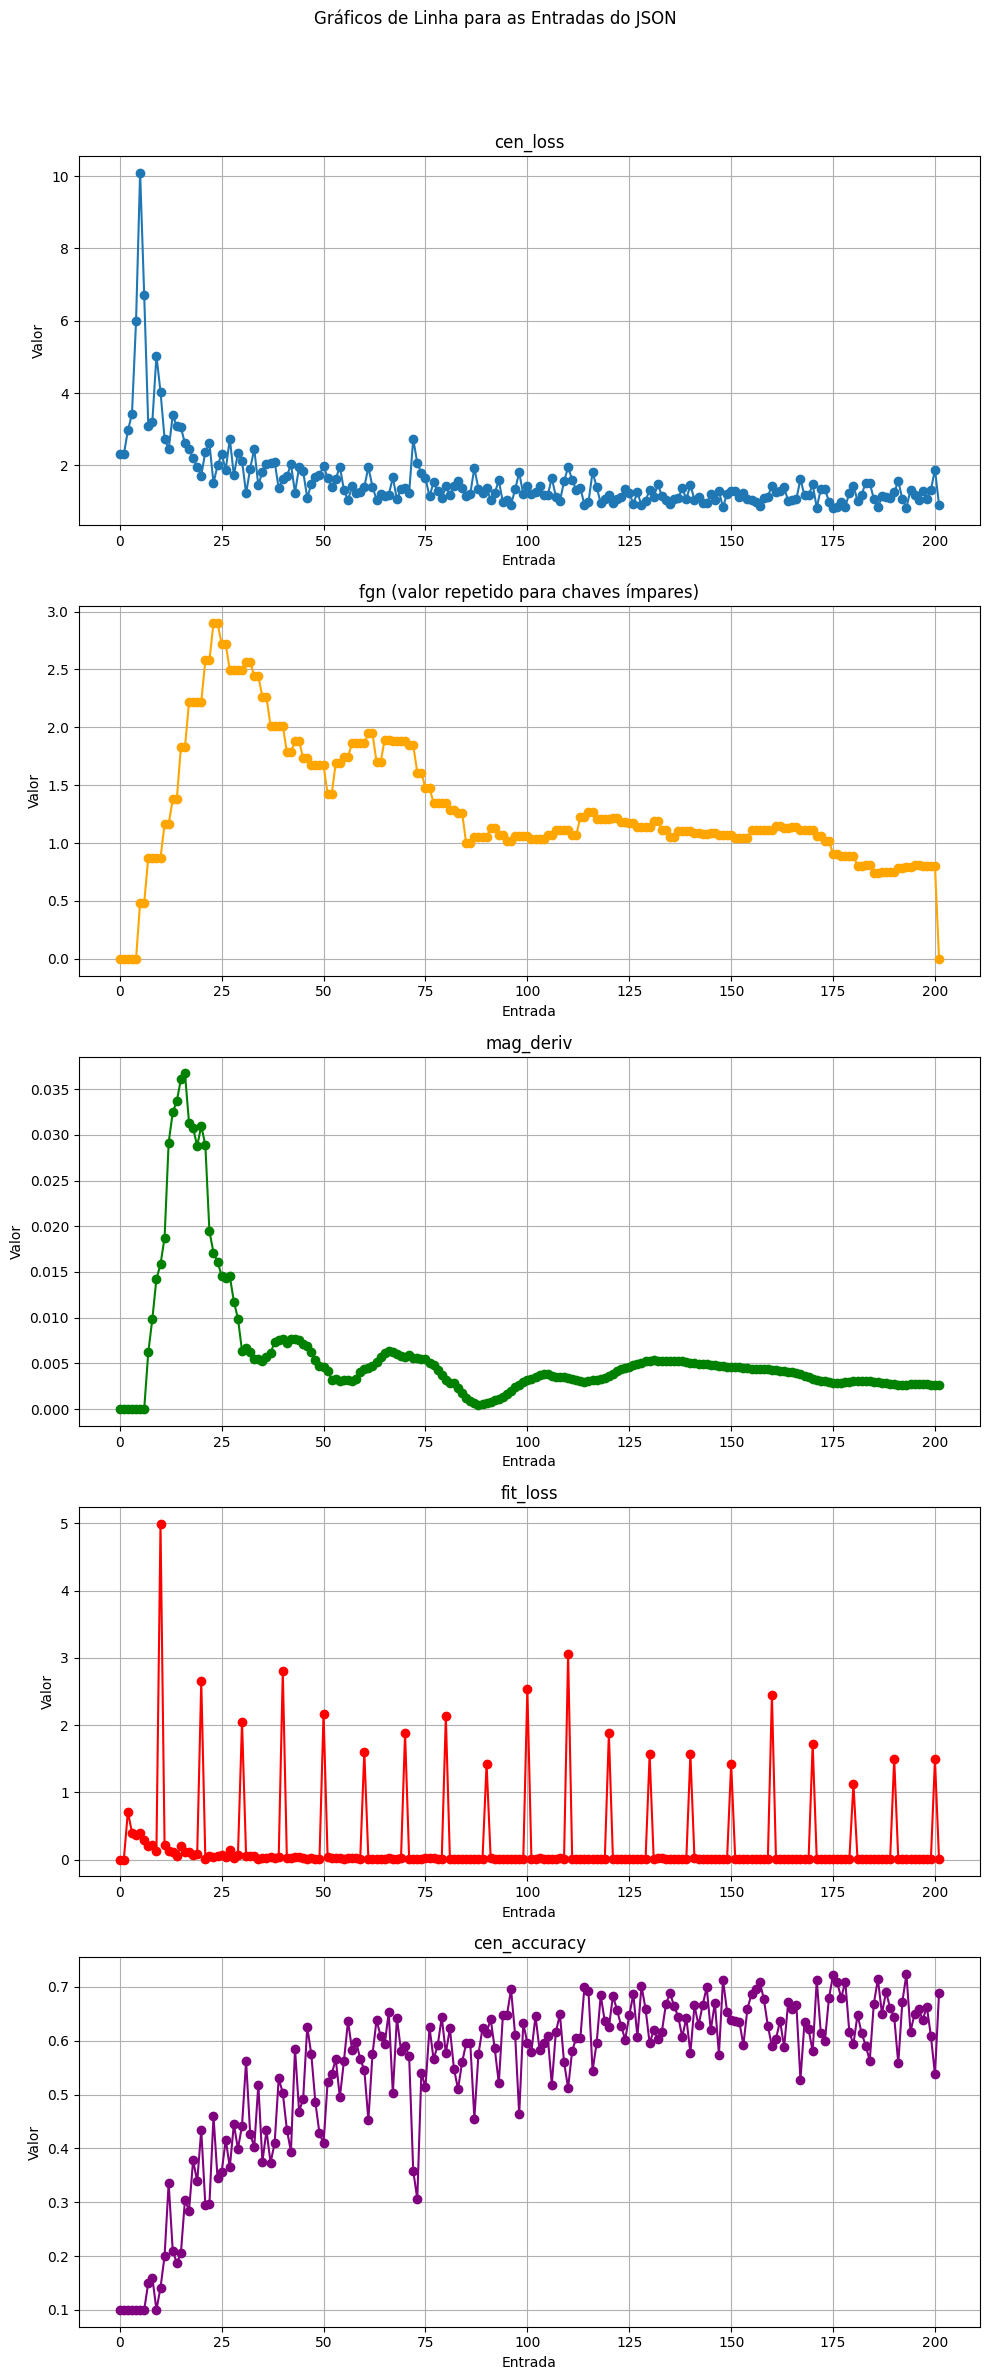

In [3]:
# 2. Gerar os gráficos de linha
fig, axs = plt.subplots(5, 1, figsize=(10, 25)) # Cria 5 subplots em uma coluna
fig.suptitle('Gráficos de Linha para as Entradas do JSON')

# Gráfico 1: cen_loss
axs[0].plot(chaves, cen_loss, marker='o')
axs[0].set_title('cen_loss')
axs[0].set_xlabel('Entrada')
axs[0].set_ylabel('Valor')
axs[0].grid(True)

# Gráfico 2: fgn
axs[1].plot(chaves, fgn, marker='o', color='orange')
axs[1].set_title('fgn (valor repetido para chaves ímpares)')
axs[1].set_xlabel('Entrada')
axs[1].set_ylabel('Valor')
axs[1].grid(True)

# Gráfico 3: mag_deriv
axs[2].plot(chaves, mag_deriv, marker='o', color='green')
axs[2].set_title('mag_deriv')
axs[2].set_xlabel('Entrada')
axs[2].set_ylabel('Valor')
axs[2].grid(True)

# Gráfico 4: fit_loss
axs[3].plot(chaves, fit_loss, marker='o', color='red')
axs[3].set_title('fit_loss')
axs[3].set_xlabel('Entrada')
axs[3].set_ylabel('Valor')
axs[3].grid(True)

# Gráfico 5: cen_accuracy
axs[4].plot(chaves, cen_accuracy, marker='o', color='purple')
axs[4].set_title('cen_accuracy')
axs[4].set_xlabel('Entrada')
axs[4].set_ylabel('Valor')
axs[4].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para evitar sobreposição de títulos
plt.show()

